## Loading and Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

/Users/rachelliao/anaconda3/envs/ensemble/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Load the dataset
df = pd.read_parquet('dataset/cleaned_data_after_eda.parquet')

## Modelling

### Logistic Regression

In [53]:
# Create X and y variables
X = df_encoded.drop(columns=['loan_status_Paid'])
y = df_encoded['loan_status_Paid']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model with training data
log_reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = log_reg.predict(X_test)

# Print the accuracy score
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print()

# Print the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print()

# Print the classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.8327800829875519

Confusion Matrix:
 [[   0  806]
 [   0 4014]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       806
         1.0       0.83      1.00      0.91      4014

    accuracy                           0.83      4820
   macro avg       0.42      0.50      0.45      4820
weighted avg       0.69      0.83      0.76      4820



### Support Vector Machine

In [54]:
# Create a support vector classifier
svc = SVC()

# Fit the model with training data
svc.fit(X_train, y_train)

# Make predictions on test data
y_pred = svc.predict(X_test)

# Print the accuracy score
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print()

# Print the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print()

# Print the classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.8327800829875519

Confusion Matrix:
 [[   0  806]
 [   0 4014]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       806
         1.0       0.83      1.00      0.91      4014

    accuracy                           0.83      4820
   macro avg       0.42      0.50      0.45      4820
weighted avg       0.69      0.83      0.76      4820



### Random Forest

In [55]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Fit the model with training data
rf.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf.predict(X_test)

# Print the accuracy score
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print()

# Print the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print()

# Print the classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 1.0

Confusion Matrix:
 [[ 806    0]
 [   0 4014]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       806
         1.0       1.00      1.00      1.00      4014

    accuracy                           1.00      4820
   macro avg       1.00      1.00      1.00      4820
weighted avg       1.00      1.00      1.00      4820



### XGBoost

In [56]:
# Create an XGBClassifier
xgb = XGBClassifier()

# Fit the model with training data
xgb.fit(X_train, y_train)

# Make predictions on test data
y_pred = xgb.predict(X_test)

# Print the accuracy score
print('Accuracy Score:', accuracy_score(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Print the classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 1.0
Confusion Matrix:
 [[ 806    0]
 [   0 4014]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       806
         1.0       1.00      1.00      1.00      4014

    accuracy                           1.00      4820
   macro avg       1.00      1.00      1.00      4820
weighted avg       1.00      1.00      1.00      4820



### Summary of Baseline Models

In [57]:
# Create a dataframe to store the accuracy scores of different models
accuracy_scores = pd.DataFrame(columns=['Model', 'Accuracy Score'])

# Create a list of models
models = [log_reg, svc, rf, xgb]

# Iterate over the models
for model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Create a dataframe from the accuracy score
    accuracy_df = pd.DataFrame([[type(model).__name__, accuracy]], columns=['Model', 'Accuracy Score'])
    
    # Append the dataframe to accuracy_scores dataframe
    accuracy_scores = accuracy_scores.append(accuracy_df, ignore_index=True)

# Display the accuracy scores dataframe
accuracy_scores

,Model,Accuracy Score
0,LogisticRegression,0.83278
1,SVC,0.83278
2,RandomForestClassifier,1.00000
3,XGBClassifier,1.00000


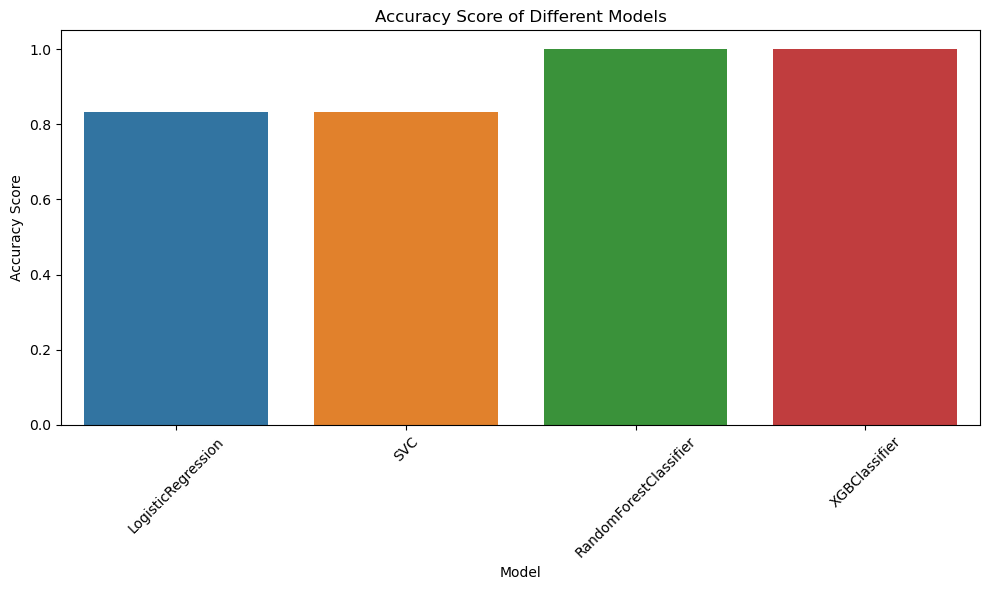

In [58]:
# Create a bar plot for accuracy scores of different models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy Score', data=accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# Create a dataframe to store the confusion matrices of different models
confusion_matrices = pd.DataFrame(columns=['Model', 'TN', 'FP', 'FN', 'TP'])

# Iterate over the models
for model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Create a confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Create a dataframe from the confusion matrix
    confusion_matrix_df = pd.DataFrame([[type(model).__name__, tn, fp, fn, tp]], columns=['Model', 'TN', 'FP', 'FN', 'TP'])
    
    # Append the dataframe to confusion_matrices dataframe
    confusion_matrices = confusion_matrices.append(confusion_matrix_df, ignore_index=True)

# Display the confusion matrices dataframe
confusion_matrices

,Model,TN,FP,FN,TP
0,LogisticRegression,0,806,0,4014
1,SVC,0,806,0,4014
2,RandomForestClassifier,806,0,0,4014
3,XGBClassifier,806,0,0,4014


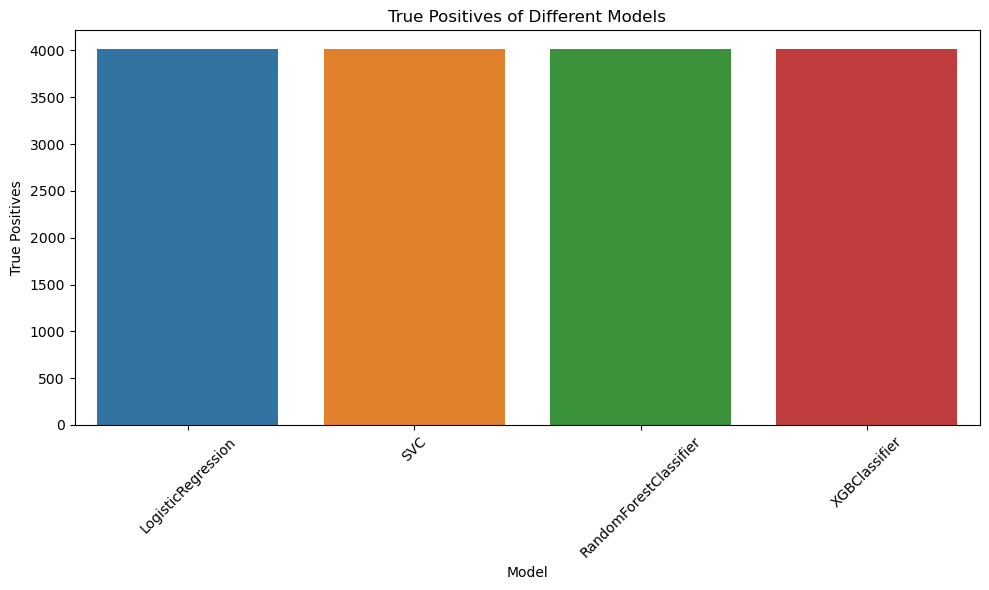

In [60]:
# Create a bar plot for confusion matrices of different models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='TP', data=confusion_matrices)
plt.xlabel('Model')
plt.ylabel('True Positives')
plt.title('True Positives of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
# Create a dataframe to store the classification reports of different models
classification_reports = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score'])

# Iterate over the models
for model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Create a classification report
    classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    
    # Create a dataframe from the classification report
    classification_report_df['Model'] = type(model).__name__
    
    # Append the dataframe to classification_reports dataframe
    classification_reports = classification_reports.append(classification_report_df, ignore_index=True)

# Display the classification reports dataframe
classification_reports

,Model,Precision,Recall,F1-Score,precision,recall,f1-score,support
0,LogisticRegression,NaN,NaN,NaN,0.000000,0.00000,0.000000,806.00000
1,LogisticRegression,NaN,NaN,NaN,0.832780,1.00000,0.908762,4014.00000
2,LogisticRegression,NaN,NaN,NaN,0.832780,0.83278,0.832780,0.83278
3,LogisticRegression,NaN,NaN,NaN,0.416390,0.50000,0.454381,4820.00000
4,LogisticRegression,NaN,NaN,NaN,0.693523,0.83278,0.756799,4820.00000
5,SVC,NaN,NaN,NaN,0.000000,0.00000,0.000000,806.00000
6,SVC,NaN,NaN,NaN,0.832780,1.00000,0.908762,4014.00000
7,SVC,NaN,NaN,NaN,0.832780,0.83278,0.832780,0.83278
8,SVC,NaN,NaN,NaN,0.416390,0.50000,0.454381,4820.00000
9,SVC,NaN,NaN,NaN,0.693523,0.83278,0.756799,4820.00000


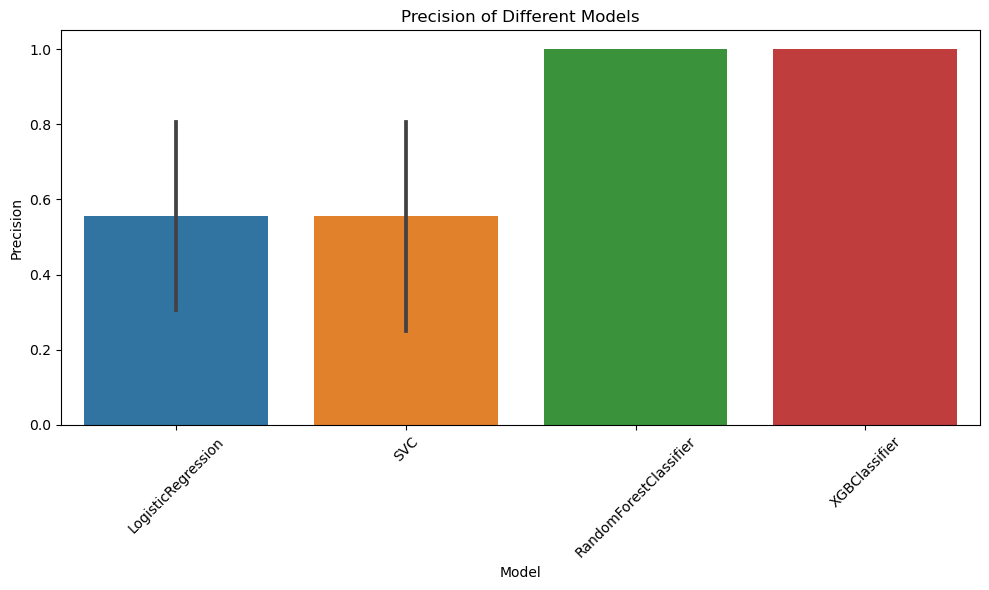

In [62]:
# Create a bar plot for precision of different models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='precision', data=classification_reports)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

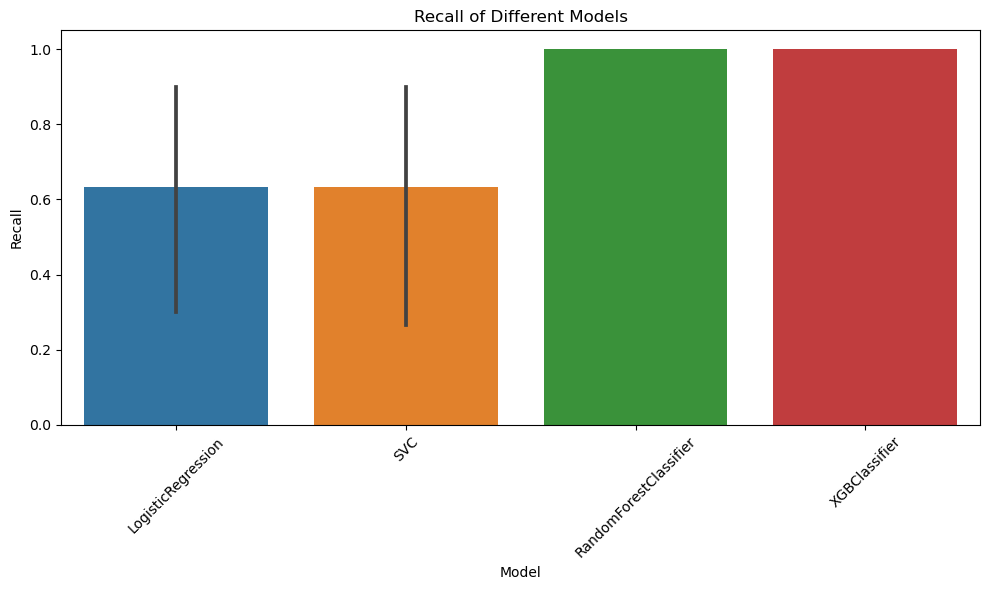

In [63]:
# Create a bar plot for recall of different models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='recall', data=classification_reports)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

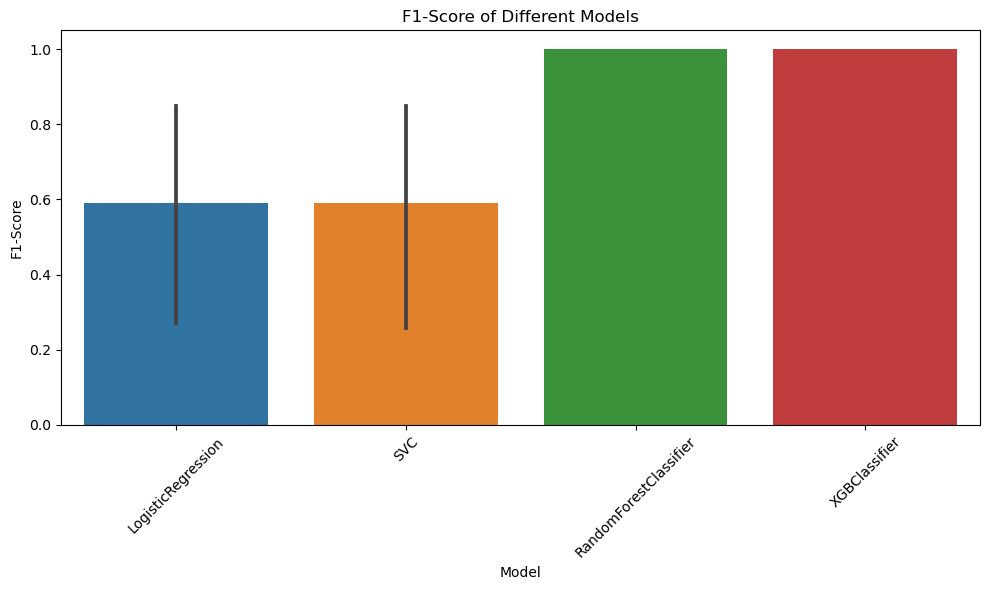

In [64]:
# Create a bar plot for f1-score of different models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='f1-score', data=classification_reports)
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()